In [1]:
# Homework 2: Simple linear regression using TensorFlow in Python
# Universidad de Monterrey
# Rafael Romero Hurtado
# Inteligencia Artificial 2
# Dr. Andrés Hernández Gutiérrez
# 8/30/2024 Monterrey, Nuevo Leon

Este fragmento de código se encarga de importar las bibliotecas necesarias para el proyecto. A continuación te explico cada una de estas importaciones:

NumPy (numpy): Manipulación y operaciones matemáticas con arrays y matrices.

Pandas (pandas): Manejo y análisis de datos tabulares mediante DataFrames y Series.

TensorFlow (tensorflow): Creación y entrenamiento de modelos de aprendizaje profundo.

Matplotlib (matplotlib.pyplot): Creación de gráficos y visualizaciones.

Scikit-learn (sklearn.model_selection): División de datos en conjuntos de entrenamiento y prueba.



In [2]:


# Import standard libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


En este bloque de codigo se declara la funcion def generate_data(true_coeffs=np.array([10, 1]), noise_std=2, num_samples=100):

Define una función que genera datos sintéticos para un modelo lineal. La función acepta tres parámetros:
true_coeffs: Un array que contiene los coeficientes verdaderos de la función lineal, noise_std: Desviación estándar del ruido aleatorio que se añadirá a los datos, num_samples: Número de muestras de datos a generar.

np.random.seed(4500): Fija la semilla para asegurar resultados reproducibles.

x = np.arange(0, 100, 1): Crea un array x de valores de 0 a 99.

y = true_coeffs[0] + true_coeffs[1] * x + np.random.normal(...): Genera y usando una función lineal con ruido aleatorio.

return (x, y): Devuelve los arrays x y y.

In [3]:
def generate_data(true_coeffs=np.array ( [10, 1]), noise_std=2, num_samples=100):
    # Seed for reproducibility
    np. random. seed (4500)
    # Generate synthetic data
    x = np. arange(0,100, 1)
    y = true_coeffs[0] + true_coeffs[1]*x + np. random.normal (loc=0.0, scale=noise_std, size=num_samples)
    # Return features and response
    return (x, y)

 A continuación se crean datos sintéticos para poder trabajar con ellos con el modelo.

true_coeffs = np.array([10, 1]): Define los coeficientes verdaderos del modelo lineal (intercepto = 10, pendiente = 1).

noise_std = 5: Establece la desviación estándar del ruido que se añadirá a los datos.

x, y = generate_data(): Genera un conjunto de datos sintéticos con 100 muestras, utilizando los coeficientes true_coeffs y el ruido especificado, y lo asigna a las variables "x" y "y" .

In [4]:
# Generate a synthetic dataset for simple linear regression
true_coeffs = np.array ([10, 1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)


La siguiente seccion de codigo es para visualizar los datos generados

plt.figure(figsize=(10,7)): Configura el tamaño de la figura.

plt.scatter(x, y, label='Synthetic dataset'): Grafica los datos sintéticos.

plt.xlabel() y plt.ylabel(): Etiqueta los ejes x e y.

plt.title(): Añade un título que describe el modelo generador de datos.

plt.legend(): Muestra la leyenda.

plt.show(): Muestra el gráfico.

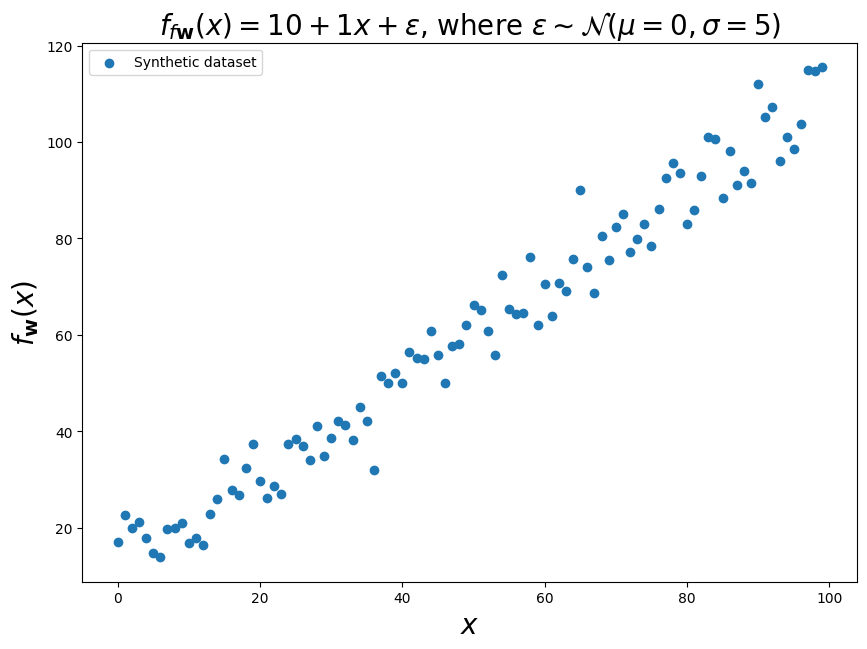

In [5]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset' )
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel ("$f_{\mathbf {w}}(x)$", fontsize=20)
plt.title(rf"$f_{{f\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
    fontsize=20)
plt.legend ()
plt.show( )

En esta parte del código se dividen los datos en entrenamiento y validación para poder entrenar de manera adecuada el modelo, posteriormente se grafica los datos de entrenamiento y validación en diferente color para poder distinguirlos

train_test_split(): Divide los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% validación), con aleatorización controlada (random_state=42).

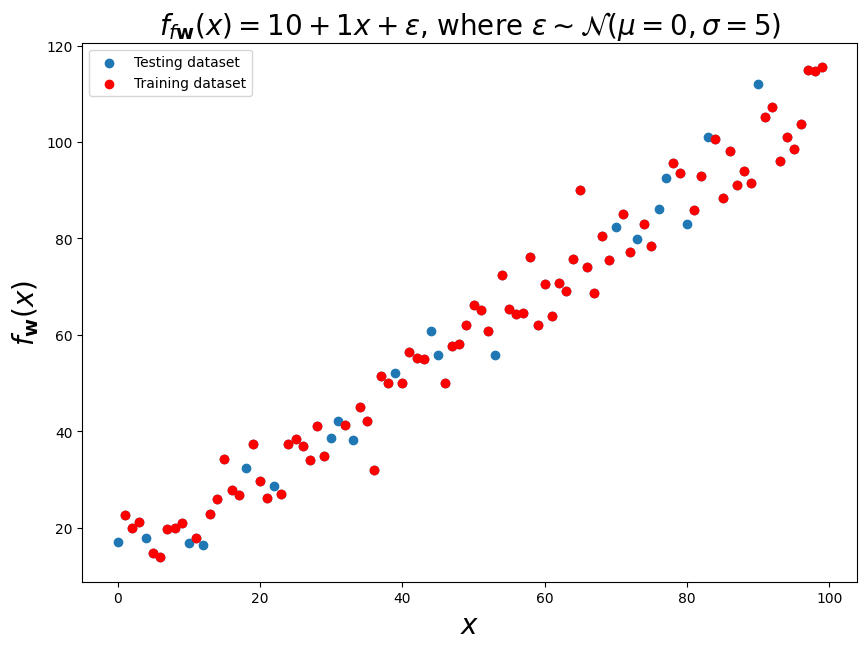

In [6]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Visualise the generated synthetica dataset
plt. figure(figsize=(10,7))
plt.scatter(x, y, label='Testing dataset' )
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt. ylabel ("$f_{\mathbf {w}}(x)$", fontsize=20)
plt.title(rf"$f_{{f\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}} (\mu=0, \sigma={noise_std})$",
    fontsize=20)
plt. legend ( )
plt. show()


Este código construye un modelo de regresión lineal simple con una sola entrada y una sola salida, y lo compila con los parámetros necesarios para su entrenamiento

tf.keras.Sequential(): Define un modelo secuencial en TensorFlow, lo que significa que las capas del modelo se apilan una tras otra.

tf.keras.layers.Input(shape=(1,)): Añade una capa de entrada que acepta una sola característica (shape=(1,)), lo que es común en una regresión lineal simple donde hay una única variable independiente x.

tf.keras.layers.Dense(1): Añade una capa densa con una sola unidad de salida. En este caso, la capa actúa como el modelo de regresión lineal.

model.compile(optimizer='adam', loss='mse'): Configura el modelo para que esté listo para ser entrenado.

optimizer='adam': Utiliza el optimizador Adam, que es un método de optimización eficiente y ampliamente utilizado en redes neuronales.

loss='mse': Especifica que la función de pérdida es el error cuadrático medio MSE, que mide la media de los cuadrados de los errores o diferencias entre los valores predichos y los reales.

In [7]:
# Build the linear regression model using a multiple-input single neuron
model = tf. keras.Sequential([
    tf.keras.layers.Input (shape=(1,)),
    tf.keras.layers.Dense (1)
])
# Compile the model
model. compile(optimizer='adam', loss='mse' )


La siguiente línea de código imprime un resumen de la arquitectura del modelo. Este resumen incluye información importante como capas del modelo, las dimensiones de salida y numero de parámetros

In [8]:
model. summary ( )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Se entrena y valida el modelo, primero en la función model.fit(): Se entrena el modelo en los datos de entrenamiento (x_train, y_train).

epochs=500: El modelo entrenará durante 500 iteraciones sobre los datos.

batch_size=10: Los datos se dividen en lotes de 10 muestras para el entrenamiento en cada paso.

validation_split=0.10: El 10% de los datos de entrenamiento se usa para validar el modelo durante el entrenamiento.

verbose=1: Muestra el progreso del entrenamiento en la consola.

model.evaluate(): Evalúa el rendimiento del modelo en los datos de prueba (x_test, y_test), devolviendo la pérdida.



In [9]:
# Train the model
model. fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)
# Evaluate the model
loss = model. evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 1416.7397 - val_loss: 1995.5403
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1560.6882 - val_loss: 1949.7205
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1453.3982 - val_loss: 1906.9575
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1212.3528 - val_loss: 1865.0062
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1265.8260 - val_loss: 1821.2903
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1341.2227 - val_loss: 1776.6764
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1369.3197 - val_loss: 1735.5820
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1231.6775 - val_loss: 1694.9551
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1311.6174 - val_loss: 1655.4022
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1052.0736 - val_loss: 1617.9542
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1238.5817 - val_loss: 1578.7592
Epoch 1

Después se obtienen los pesos, con weights = model.layers[0].get_weights(), Esto recupera los pesos (w1) y sesgos (w0) de la única capa del modelo.

In [10]:
# Print the weights of the trained model
weights = model.layers[0].get_weights()
print (f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights [1]}")


Weights [w1]: [[1.1190279]]
Biases [w0]: [1.7665468]


A continuación código genera predicciones utilizando el modelo entrenado, tanto con el conjunto de datos de prueba (x_test) como al de entrenamiento (x_train)

In [11]:
# Make predictions
y_pred = model. predict(x_test)

# Make predictions
y_pred_train = model. predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Para finalizar el código visualiza el ajuste del modelo entrenado, comparando los datos reales de entrenamiento con las predicciones generadas.

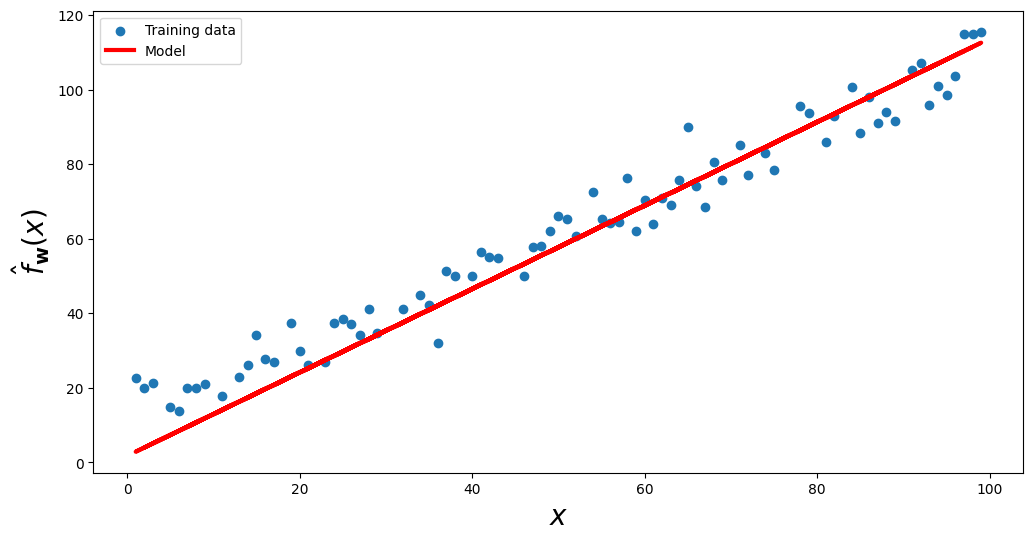

In [12]:
# Plot the results
plt. figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel (r'$x$', fontsize=20)
plt. ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)
plt. legend ();

Conclusiones

En esta actividad, trabajé con un modelo de regresión lineal simple utilizando TensorFlow, lo que me permitió recordar la manera de cómo dividir datos para validar el rendimiento y evitar el sobreajuste. Fue como refrescar la memoria de lo visto en Inteligencia Artificial 1, de igual forma me di la tarea de investigar a más detalle los parámetros de las funciones y entender que son cada uno de ellos.